In [2]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import joblib
import numpy as np

In [3]:
# set working directory
working_directory = 'D:/machine_learning/DFS/NHL/'
os.chdir(working_directory)
data_dir = 'Data/' #Where is your data located?
etl_dir = 'Data/ETL/' #Where is your output data going?

## Centers

In [34]:
player_stats = pd.read_csv('Data/alldata_2016-2022.csv', index_col = 0) #Read In Our Main Dataset
c_df = pd.read_csv(etl_dir + 'c_stats.csv', index_col = 0)

# ordinal encode HomeorAway column
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
c_df['HomeOrAway'] = encoder.fit_transform(c_df['HomeOrAway'].to_numpy().reshape(-1, 1))

c_df = c_df.rename(columns={'Team_x' : 'Team'})

# convert date from object dtype to datetime
c_df['Date'] = pd.to_datetime(c_df['Date'], format = '%Y%m%d')
c_df['Date'] = c_df['Date'].dt.strftime('%Y%m%d')

#C DK PTS Rank For The Given Season & Date Pair
c_df['Act_C_FPRank'] = c_df.groupby(['Season','Date'])['FantasyPointsFanDuel'].rank(method='min', ascending = False)

#Columns We Want To Add To Dataset
keep_cols = ['Season','Date','Name','Act_C_FPRank']

#Make sure we have no duplicated columns or infinity errors
c_df = c_df.loc[:,~c_df.columns.duplicated()]
c_df= c_df.replace([np.inf, -np.inf], np.nan)

# columns that are dropped before model is created
dcols = ['TeamID', 'PlayerID', 'Team', 'Position', 'Games', 'Started', 
         'Goals', 'Assists', 'Points', 'PlusMinus', 'HatTricks',
       'PenaltyMinutes', 'PowerPlayGoals', 'ShortHandedGoals', 'ShotsOnGoal',
       'Blocks', 'Act_C_FPRank',
       'Month', 'Year', 'Season', 'Date', 'Name', 'Opponent',
]

C:\Users\Greg\AppData\Local\Temp\ipykernel_13000\2236828332.py:1: DtypeWarning: Columns (63) have mixed types. Specify dtype option on import or set low_memory=False.
  player_stats = pd.read_csv('Data/alldata_2016-2022.csv', index_col = 0) #Read In Our Main Dataset


In [35]:
df = c_df.drop(dcols, axis = 1)

In [36]:
df.corr()

,FantasyPointsFanDuel,HomeOrAway,GM3,GM_pg3,G3,G_pg3,A3,A_pg3,PTS3,PTS_pg3,...,def_PIM_pg,def_PPG,def_PPG_pg,def_SHG_pg,def_SOG,def_SOG_pg,def_BLK,def_BLK_pg,def_FP,def_FP_pg
FantasyPointsFanDuel,1.000000,0.032512,0.207464,0.211562,0.201476,0.200043,0.225031,0.223447,0.274949,0.273866,...,-0.010131,-0.003169,0.006405,0.001113,-0.003526,0.030674,-0.014978,0.003382,0.001723,0.035408
HomeOrAway,0.032512,1.000000,-0.002752,-0.003633,-0.004246,-0.004713,-0.004904,-0.004547,-0.005910,-0.005933,...,-0.002100,-0.002914,-0.002143,-0.001402,0.000905,0.001157,0.002571,0.008143,-0.000179,0.000842
GM3,0.207464,-0.002752,1.000000,0.950495,0.259220,0.238065,0.290813,0.265914,0.354678,0.325917,...,0.003345,-0.008066,0.000112,0.003759,-0.002469,0.027203,0.002251,0.016272,0.000529,0.028363
GM_pg3,0.211562,-0.003633,0.950495,1.000000,0.248147,0.247070,0.278553,0.277432,0.339645,0.339301,...,0.001066,-0.009087,-0.000512,0.002603,-0.005603,0.028302,0.000130,0.017081,-0.001909,0.030140
G3,0.201476,-0.004246,0.259220,0.248147,1.000000,0.987865,0.207400,0.199879,0.709363,0.699249,...,-0.006259,-0.004208,0.011915,0.006416,-0.014933,0.026426,-0.024643,-0.000669,-0.012703,0.029429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
def_SOG_pg,0.030674,0.001157,0.027203,0.028302,0.026426,0.026677,0.001828,0.001715,0.016114,0.016221,...,0.046349,0.192292,0.191750,0.058162,0.463566,1.000000,0.069317,0.143072,0.377852,0.726089
def_BLK,-0.014978,0.002571,0.002251,0.000130,-0.024643,-0.025069,-0.007633,-0.007512,-0.019298,-0.019508,...,0.057584,0.228220,-0.069306,-0.015177,0.623440,0.069317,1.000000,0.574675,0.648934,0.081830
def_BLK_pg,0.003382,0.008143,0.016272,0.017081,-0.000669,-0.000662,-0.005836,-0.004652,-0.004580,-0.003735,...,0.007290,-0.007048,-0.007741,0.006708,0.007980,0.143072,0.574675,1.000000,0.071331,0.250885
def_FP,0.001723,-0.000179,0.000529,-0.001909,-0.012703,-0.014028,-0.000071,-0.000468,-0.007164,-0.008216,...,0.073104,0.481812,0.097956,0.046959,0.912495,0.377852,0.648934,0.071331,1.000000,0.447607


<AxesSubplot: >

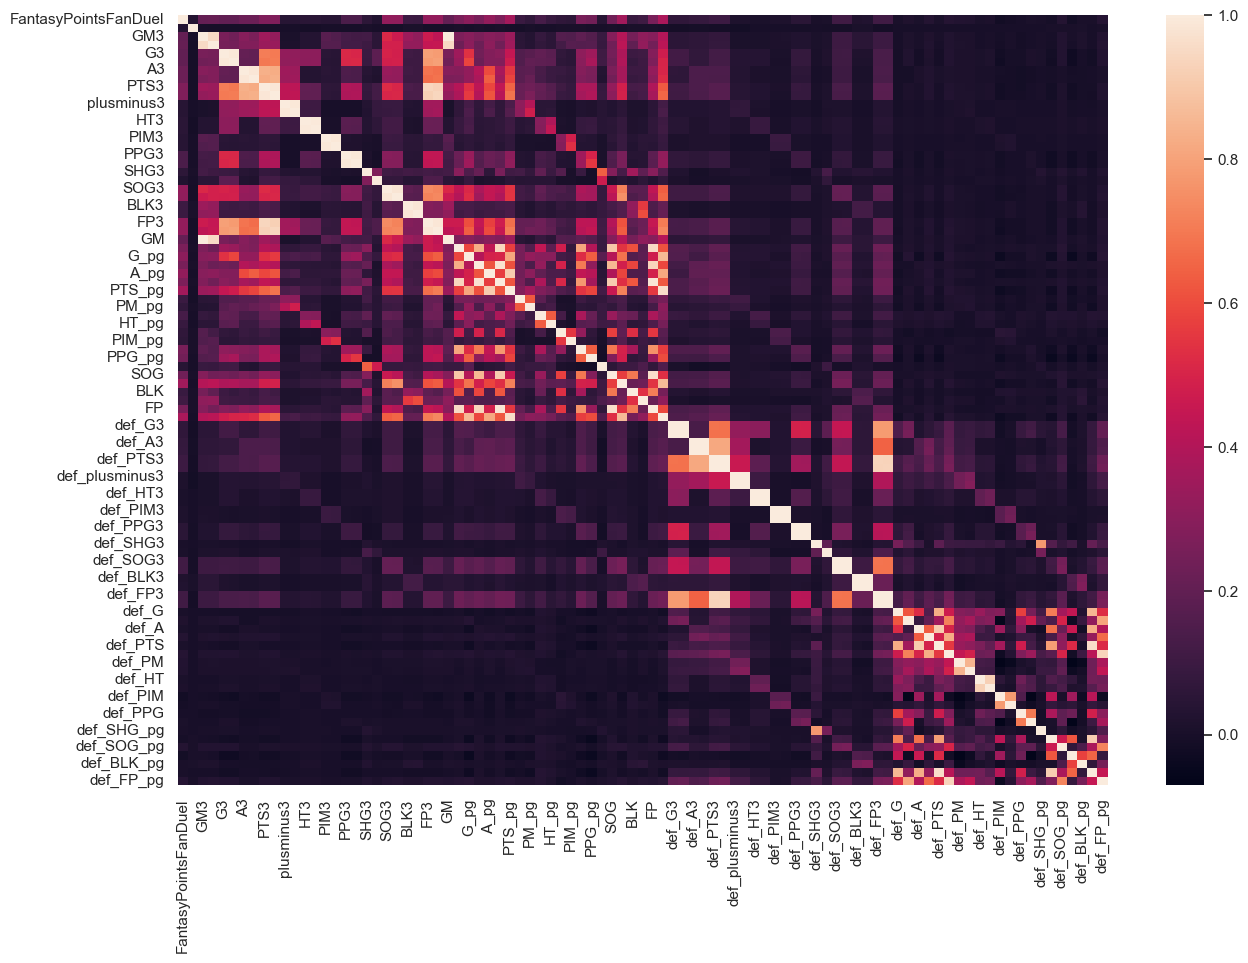

In [37]:
# correlation heatmap
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr())

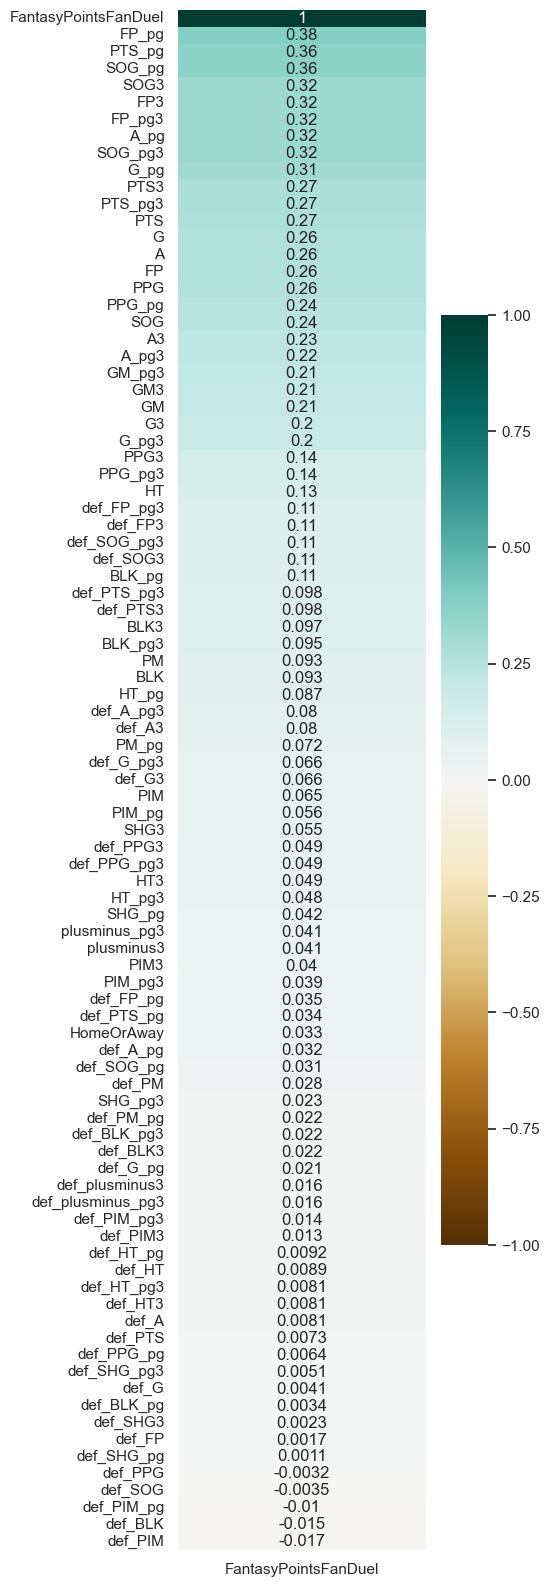

In [38]:
plt.figure(figsize=(4, 20))
heatmap = sns.heatmap(df.corr()[['FantasyPointsFanDuel']].sort_values(by='FantasyPointsFanDuel', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

## Wings

In [39]:
player_stats = pd.read_csv('Data/alldata_2016-2022.csv', index_col = 0) #Read In Our Main Dataset
w_df = pd.read_csv(etl_dir + 'w_stats.csv', index_col = 0)

# ordinal encode HomeorAway column
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
w_df['HomeOrAway'] = encoder.fit_transform(w_df['HomeOrAway'].to_numpy().reshape(-1, 1))

w_df = w_df.rename(columns={'Team_x' : 'Team'})

# convert date from object dtype to datetime
w_df['Date'] = pd.to_datetime(w_df['Date'], format = '%Y%m%d')
w_df['Date'] = w_df['Date'].dt.strftime('%Y%m%d')

#W DK PTS Rank For The Given Season & Date Pair
w_df['Act_W_FPRank'] = w_df.groupby(['Season','Date'])['FantasyPointsFanDuel'].rank(method='min', ascending = False)

#Columns We Want To Add To Dataset
keep_cols = ['Season','Date','Name','Act_W_FPRank']

#Make sure we have no duplicated columns or infinity errors
w_df = w_df.loc[:,~w_df.columns.duplicated()]
w_df= w_df.replace([np.inf, -np.inf], np.nan)

#Columns We Can't Include In Our Features Datasets
dcols = ['TeamID', 'PlayerID', 'Team', 'Position', 'Games', 'Started', 
         'Goals', 'Assists', 'Points', 'PlusMinus', 'HatTricks',
       'PenaltyMinutes', 'PowerPlayGoals', 'ShortHandedGoals', 'ShotsOnGoal',
       'Blocks', 'Season', 'Act_W_FPRank',
       'Month', 'Year'
]

C:\Users\Greg\AppData\Local\Temp\ipykernel_13000\306054208.py:1: DtypeWarning: Columns (63) have mixed types. Specify dtype option on import or set low_memory=False.
  player_stats = pd.read_csv('Data/alldata_2016-2022.csv', index_col = 0) #Read In Our Main Dataset


In [40]:
df = w_df.drop(dcols, axis = 1)

In [41]:
df.corr()

C:\Users\Greg\AppData\Local\Temp\ipykernel_13000\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,FantasyPointsFanDuel,HomeOrAway,GM3,GM_pg3,G3,G_pg3,A3,A_pg3,PTS3,PTS_pg3,...,def_PIM_pg,def_PPG,def_PPG_pg,def_SHG_pg,def_SOG,def_SOG_pg,def_BLK,def_BLK_pg,def_FP,def_FP_pg
FantasyPointsFanDuel,1.000000,0.031254,0.227475,0.230512,0.206178,0.204195,0.222541,0.219958,0.276223,0.274242,...,0.000620,0.018002,0.038600,0.007496,-0.009751,0.045320,-0.017614,0.006040,-0.001065,0.053195
HomeOrAway,0.031254,1.000000,-0.000907,-0.002662,-0.000265,-0.000454,0.002505,0.002043,0.001581,0.001152,...,0.002767,0.001909,-0.000303,0.000424,-0.000122,0.000267,0.001947,0.004827,0.001613,0.001207
GM3,0.227475,-0.000907,1.000000,0.955718,0.280127,0.257966,0.297311,0.274767,0.371793,0.344291,...,0.001860,0.014658,0.032593,0.003870,-0.007671,0.049568,-0.015383,0.017280,-0.004401,0.047243
GM_pg3,0.230512,-0.002662,0.955718,1.000000,0.269960,0.268547,0.285611,0.284423,0.357669,0.357290,...,0.001090,0.015936,0.034526,0.002761,-0.009985,0.048875,-0.016880,0.017052,-0.006102,0.047515
G3,0.206178,-0.000265,0.280127,0.269960,1.000000,0.986858,0.206755,0.199362,0.734343,0.724405,...,-0.001012,0.009458,0.035840,0.006817,-0.020136,0.036897,-0.020014,0.009186,-0.014697,0.039743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
def_SOG_pg,0.045320,0.000267,0.049568,0.048875,0.036897,0.035847,0.037595,0.036326,0.047885,0.046552,...,0.056456,0.269749,0.365268,0.048630,0.438658,1.000000,0.027452,0.144593,0.368733,0.778154
def_BLK,-0.017614,0.001947,-0.015383,-0.016880,-0.020014,-0.020399,-0.009510,-0.009519,-0.018424,-0.018730,...,0.059478,0.215408,-0.057618,0.064411,0.584176,0.027452,1.000000,0.621647,0.608814,0.086251
def_BLK_pg,0.006040,0.004827,0.017280,0.017052,0.009186,0.008181,0.009149,0.008725,0.011776,0.010926,...,0.050461,0.041589,0.064665,0.026383,0.036602,0.144593,0.621647,1.000000,0.100231,0.226134
def_FP,-0.001065,0.001613,-0.004401,-0.006102,-0.014697,-0.015123,0.003210,0.003068,-0.006457,-0.006840,...,0.031056,0.510317,0.154733,0.128152,0.910416,0.368733,0.608814,0.100231,1.000000,0.486505


C:\Users\Greg\AppData\Local\Temp\ipykernel_13000\4073223393.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

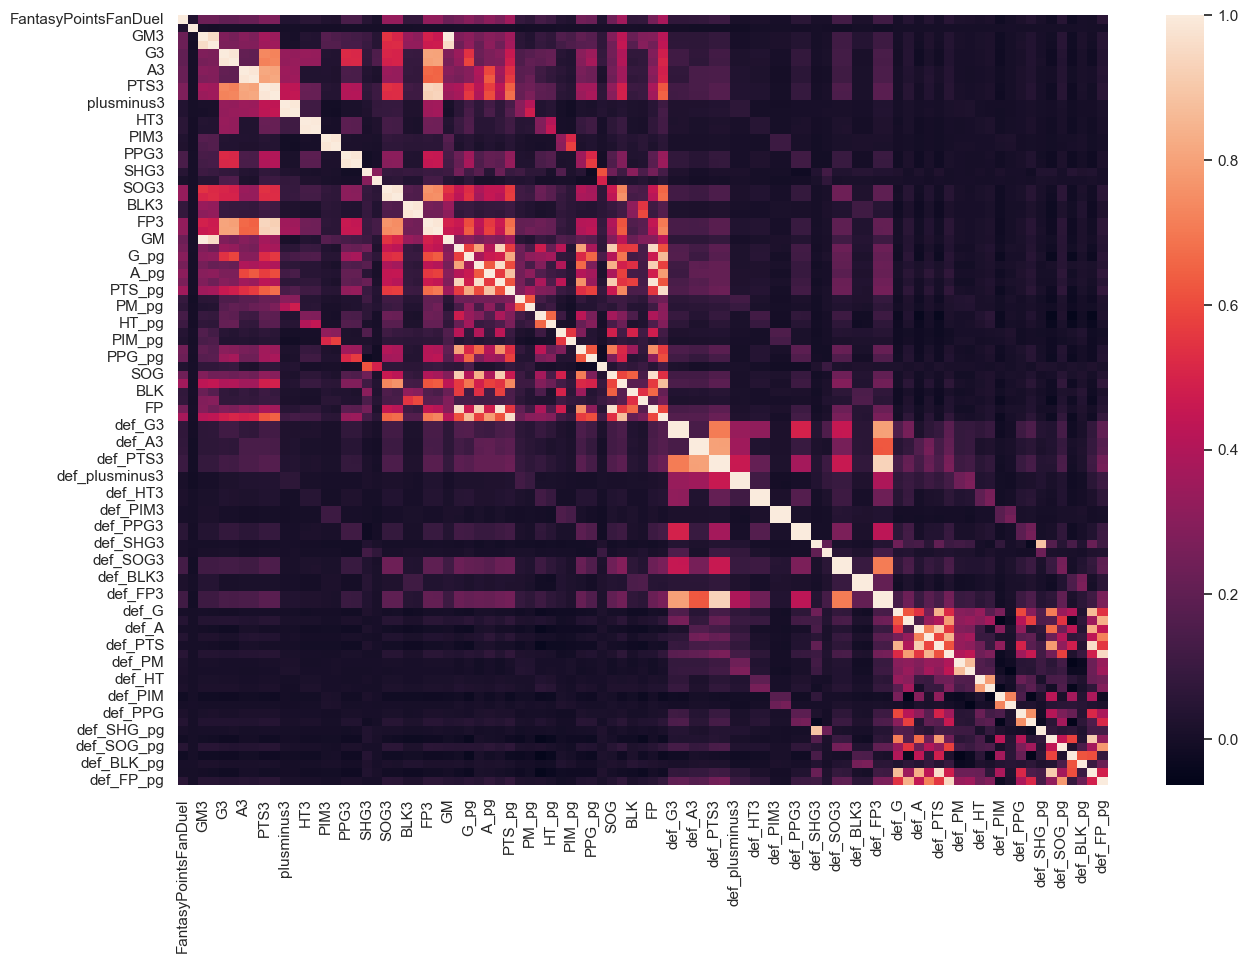

In [42]:
# correlation heatmap
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr())

C:\Users\Greg\AppData\Local\Temp\ipykernel_13000\3547006304.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr()[['FantasyPointsFanDuel']].sort_values(by='FantasyPointsFanDuel', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


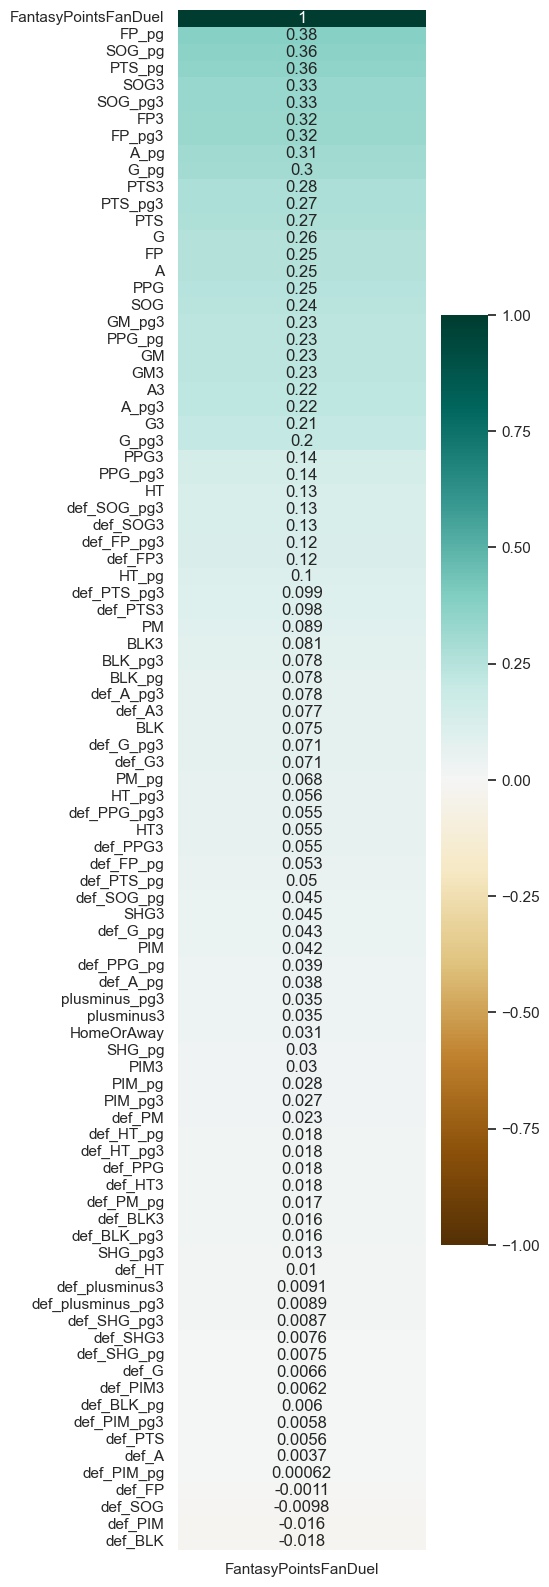

In [43]:
plt.figure(figsize=(4, 20))
heatmap = sns.heatmap(df.corr()[['FantasyPointsFanDuel']].sort_values(by='FantasyPointsFanDuel', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

## Defensemen

In [46]:
player_stats = pd.read_csv('Data/alldata_2016-2022.csv', index_col = 0) #Read In Our Main Dataset
d_df = pd.read_csv(etl_dir + 'd_stats.csv', index_col = 0)

# ordinal encode HomeorAway column
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
d_df['HomeOrAway'] = encoder.fit_transform(d_df['HomeOrAway'].to_numpy().reshape(-1, 1))

d_df = d_df.rename(columns={'Team_x' : 'Team'})

# convert date from object dtype to datetime
d_df['Date'] = pd.to_datetime(d_df['Date'], format = '%Y%m%d')
d_df['Date'] = d_df['Date'].dt.strftime('%Y%m%d')

#D DK PTS Rank For The Given Season & Date Pair
d_df['Act_D_FPRank'] = d_df.groupby(['Season','Date'])['FantasyPointsFanDuel'].rank(method='min', ascending = False)

#Columns We Want To Add To Dataset
keep_cols = ['Season','Date','Name','Act_D_FPRank']

#Make sure we have no duplicated columns or infinity errors
d_df = d_df.loc[:,~d_df.columns.duplicated()]
d_df= d_df.replace([np.inf, -np.inf], np.nan)

#Columns We Can't Include In Our Features Datasets
dcols = ['TeamID', 'PlayerID', 'Team', 'Position', 'Games', 'Started', 
         'Goals', 'Assists', 'Points', 'PlusMinus', 'HatTricks',
       'PenaltyMinutes', 'PowerPlayGoals', 'ShortHandedGoals', 'ShotsOnGoal',
       'Blocks', 'Season', 'Act_D_FPRank',
       'Month', 'Year'
]

C:\Users\Greg\AppData\Local\Temp\ipykernel_13000\2622959761.py:1: DtypeWarning: Columns (63) have mixed types. Specify dtype option on import or set low_memory=False.
  player_stats = pd.read_csv('Data/alldata_2016-2022.csv', index_col = 0) #Read In Our Main Dataset


In [47]:
df = d_df.drop(dcols, axis = 1)

In [48]:
df.corr()

C:\Users\Greg\AppData\Local\Temp\ipykernel_13000\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,FantasyPointsFanDuel,HomeOrAway,GM3,GM_pg3,G3,G_pg3,A3,A_pg3,PTS3,PTS_pg3,...,def_PIM_pg,def_PPG,def_PPG_pg,def_SHG_pg,def_SOG,def_SOG_pg,def_BLK,def_BLK_pg,def_FP,def_FP_pg
FantasyPointsFanDuel,1.000000,0.020848,0.317012,0.320315,0.160474,0.158602,0.241084,0.238023,0.272166,0.269485,...,-0.002451,0.006432,0.009093,0.001311,0.026311,0.037099,0.003757,0.010254,0.021711,0.039472
HomeOrAway,0.020848,1.000000,-0.004766,-0.005170,-0.010016,-0.010048,-0.006105,-0.005810,-0.009358,-0.009149,...,0.002313,-0.000562,0.000338,0.004173,0.003222,-0.000472,0.003502,0.000526,0.003864,0.000782
GM3,0.317012,-0.004766,1.000000,0.969913,0.201558,0.189870,0.333639,0.315077,0.368150,0.348370,...,0.002284,-0.008603,-0.005565,0.000514,0.010869,0.013989,0.003405,0.013827,0.006660,0.017834
GM_pg3,0.320315,-0.005170,0.969913,1.000000,0.196332,0.194922,0.324666,0.323088,0.358329,0.357320,...,0.002032,-0.009003,-0.005614,0.002222,0.009722,0.014354,0.001302,0.012360,0.005946,0.018910
G3,0.160474,-0.010016,0.201558,0.196332,1.000000,0.988425,0.142151,0.137237,0.535611,0.528660,...,-0.005955,0.010153,0.018088,0.001449,0.010873,0.016778,0.001722,-0.000084,0.012892,0.021935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
def_SOG_pg,0.037099,-0.000472,0.013989,0.014354,0.016778,0.017030,0.022788,0.023467,0.026393,0.027148,...,0.151807,0.104838,0.202041,0.070780,0.375753,1.000000,-0.029967,0.138380,0.230543,0.711544
def_BLK,0.003757,0.003502,0.003405,0.001302,0.001722,0.002110,0.011888,0.010509,0.010855,0.009862,...,0.007990,0.167619,-0.066794,0.000710,0.652668,-0.029967,1.000000,0.392432,0.775458,0.089544
def_BLK_pg,0.010254,0.000526,0.013827,0.012360,-0.000084,0.000547,0.004702,0.005486,0.003976,0.004918,...,0.081290,-0.009809,-0.030886,0.036538,-0.056302,0.138380,0.392432,1.000000,0.070559,0.424033
def_FP,0.021711,0.003864,0.006660,0.005946,0.012892,0.012710,0.028646,0.027474,0.029780,0.028776,...,-0.026375,0.334470,0.038601,0.037946,0.902075,0.230543,0.775458,0.070559,1.000000,0.341137


C:\Users\Greg\AppData\Local\Temp\ipykernel_13000\4073223393.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

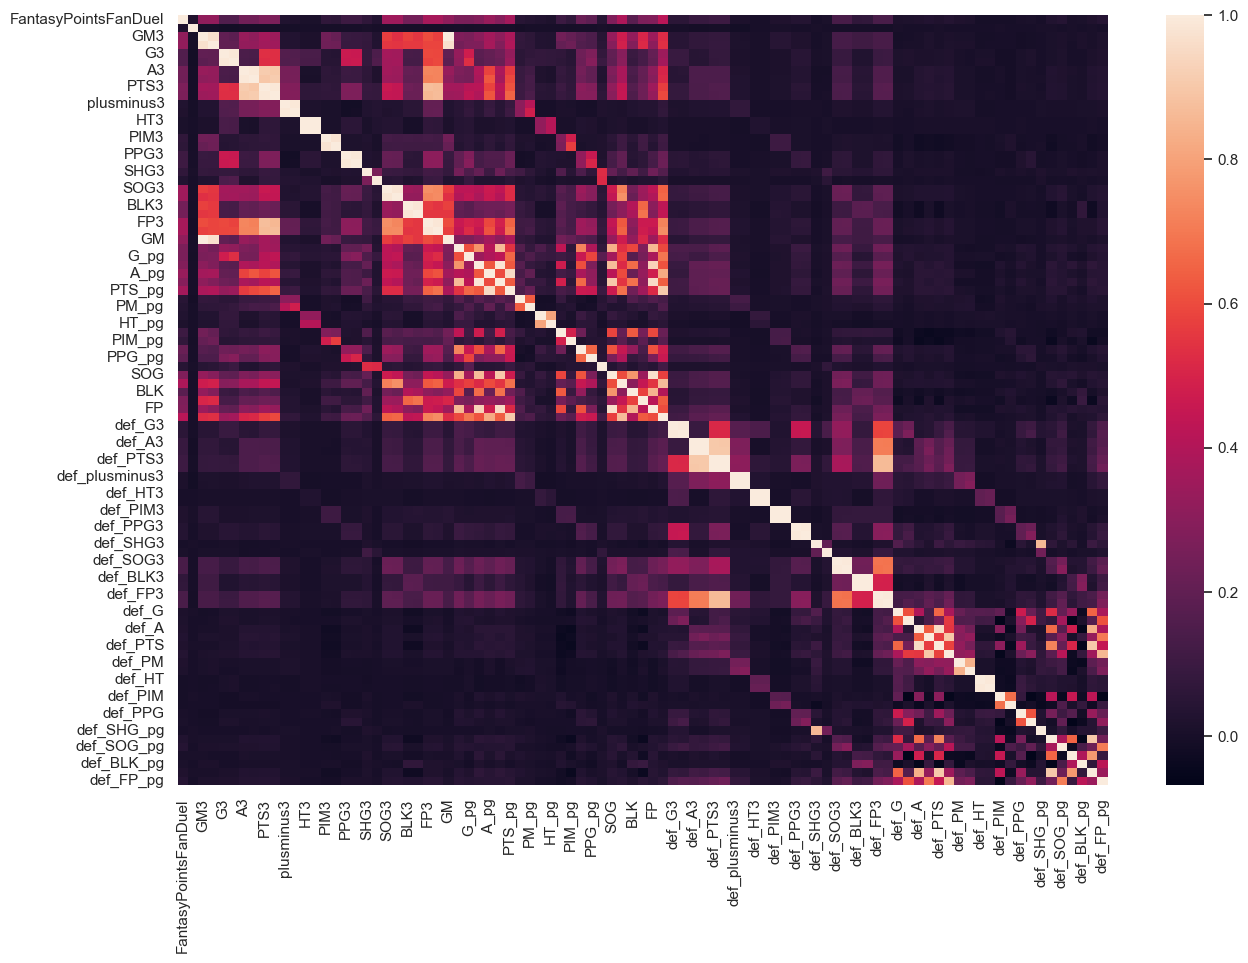

In [49]:
# correlation heatmap
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr())

C:\Users\Greg\AppData\Local\Temp\ipykernel_13000\3547006304.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr()[['FantasyPointsFanDuel']].sort_values(by='FantasyPointsFanDuel', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


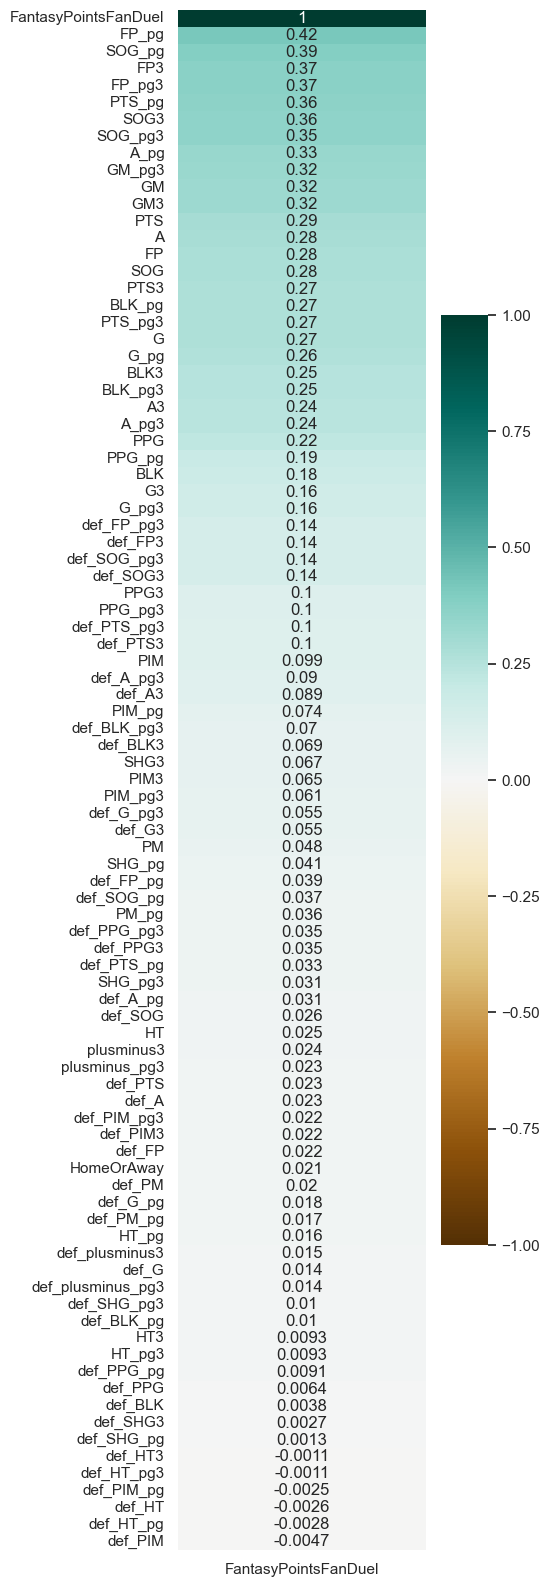

In [50]:
plt.figure(figsize=(4, 20))
heatmap = sns.heatmap(df.corr()[['FantasyPointsFanDuel']].sort_values(by='FantasyPointsFanDuel', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

## Goalies

In [54]:
player_stats = pd.read_csv('Data/alldata_2016-2022.csv', index_col = 0) #Read In Our Main Dataset
g_df = pd.read_csv(etl_dir + 'g_stats.csv', index_col = 0)

# ordinal encode HomeorAway column
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
g_df['HomeOrAway'] = encoder.fit_transform(g_df['HomeOrAway'].to_numpy().reshape(-1, 1))

g_df = g_df.rename(columns={'Team_x' : 'Team'})

# convert date from object dtype to datetime
g_df['Date'] = pd.to_datetime(g_df['Date'], format = '%Y%m%d')
g_df['Date'] = g_df['Date'].dt.strftime('%Y%m%d')

#G DK PTS Rank For The Given Season & Date Pair
g_df['Act_G_FPRank'] = g_df.groupby(['Season','Date'])['FantasyPointsFanDuel'].rank(method='min', ascending = False)

#Columns We Want To Add To Dataset
keep_cols = ['Season','Date','Name','Act_G_FPRank']

#Make sure we have no duplicated columns or infinity errors
g_df = g_df.loc[:,~g_df.columns.duplicated()]
g_df= g_df.replace([np.inf, -np.inf], np.nan)

#Columns We Can't Include In Our Features Datasets
dcols = [
     'TeamID',
     'PlayerID',
     'Team',
     'Position',
     'Games',
     'Started',
     'GoaltendingWins',
     'GoaltendingLosses',
     'GoaltendingOvertimeLosses',
     'GoaltendingShotsAgainst',
     'GoaltendingGoalsAgainst',
     'GoaltendingSaves',
     'GoaltendingShutouts',
     'GoaltendingGoalsAgainstAverage',
     'GoaltendingSavePercentage',
     'GoaltendingMinutes',
     'Month',
     'Year',
     'Act_G_FPRank',
     'Season'
    ]

C:\Users\Greg\AppData\Local\Temp\ipykernel_13000\1211989156.py:1: DtypeWarning: Columns (63) have mixed types. Specify dtype option on import or set low_memory=False.
  player_stats = pd.read_csv('Data/alldata_2016-2022.csv', index_col = 0) #Read In Our Main Dataset


In [55]:
df = g_df.drop(dcols, axis = 1)

In [56]:
df.corr()

C:\Users\Greg\AppData\Local\Temp\ipykernel_13000\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,FantasyPointsFanDuel,HomeOrAway,GM3,GM_pg3,GTW3,GTW_pg3,GTL3,GTL_pg3,GTOTL3,GTOTL_pg3,...,def_GTSO,def_GTSO_pg,def_GTGAA_pg,def_GTSP_pg,def_GTM,def_GTM_pg,def_FP,def_FP_pg,def_WP,def_SPM
FantasyPointsFanDuel,1.000000,0.021576,0.204636,0.203731,0.184728,0.184024,0.066628,0.065855,0.033242,0.034823,...,0.022031,0.020472,-0.016309,0.028738,0.011964,0.032155,0.024318,0.049596,0.053854,0.046732
HomeOrAway,0.021576,1.000000,-0.005027,-0.004626,0.000435,0.000136,-0.004453,-0.003613,0.003370,0.003295,...,-0.000255,-0.008498,-0.011428,0.002531,0.004340,0.004348,0.002569,0.002550,-0.004778,0.003151
GM3,0.204636,-0.005027,1.000000,0.980333,0.647794,0.634256,0.502953,0.491468,0.216163,0.208587,...,0.014239,0.011637,0.055790,0.085380,0.042392,0.082582,0.042067,0.065934,0.045237,0.089681
GM_pg3,0.203731,-0.004626,0.980333,1.000000,0.632108,0.636507,0.488911,0.492223,0.212151,0.214118,...,0.016454,0.013064,0.053210,0.083065,0.040729,0.080528,0.040792,0.064839,0.046213,0.087545
GTW3,0.184728,0.000435,0.647794,0.632108,1.000000,0.989169,-0.129303,-0.133819,-0.053603,-0.056086,...,0.015014,0.023015,0.023205,0.055990,0.020436,0.053967,0.024592,0.056610,0.053108,0.050084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
def_GTM_pg,0.032155,0.004348,0.082582,0.080528,0.053967,0.051998,0.049554,0.049554,0.031271,0.029535,...,0.274317,0.236013,0.380234,0.967102,0.578641,1.000000,0.573061,0.793609,0.366066,0.545032
def_FP,0.024318,0.002569,0.042067,0.040792,0.024592,0.023110,0.024089,0.023593,0.010088,0.009456,...,0.595296,0.207673,0.147143,0.545940,0.941116,0.573061,1.000000,0.586513,0.353596,0.317030
def_FP_pg,0.049596,0.002550,0.065934,0.064839,0.056610,0.055305,0.030078,0.029906,0.018549,0.017188,...,0.418474,0.489113,0.041568,0.759355,0.432281,0.793609,0.586513,1.000000,0.679070,0.481197
def_WP,0.053854,-0.004778,0.045237,0.046213,0.053108,0.053507,0.009407,0.009388,0.009794,0.009484,...,0.291005,0.316582,-0.100959,0.318449,0.178701,0.366066,0.353596,0.679070,1.000000,0.314538


C:\Users\Greg\AppData\Local\Temp\ipykernel_13000\4073223393.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

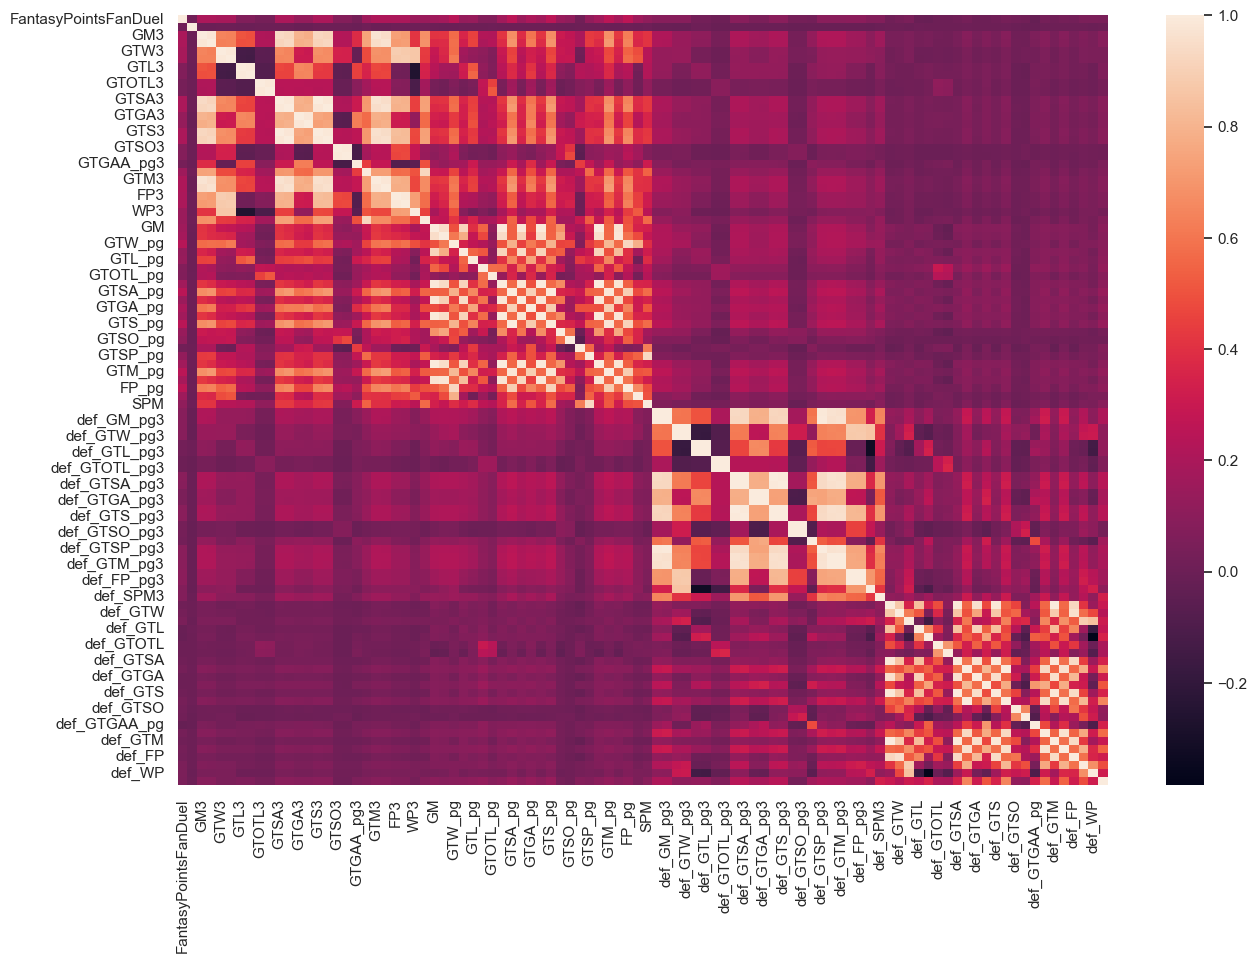

In [57]:
# correlation heatmap
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr())

C:\Users\Greg\AppData\Local\Temp\ipykernel_13000\3547006304.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr()[['FantasyPointsFanDuel']].sort_values(by='FantasyPointsFanDuel', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


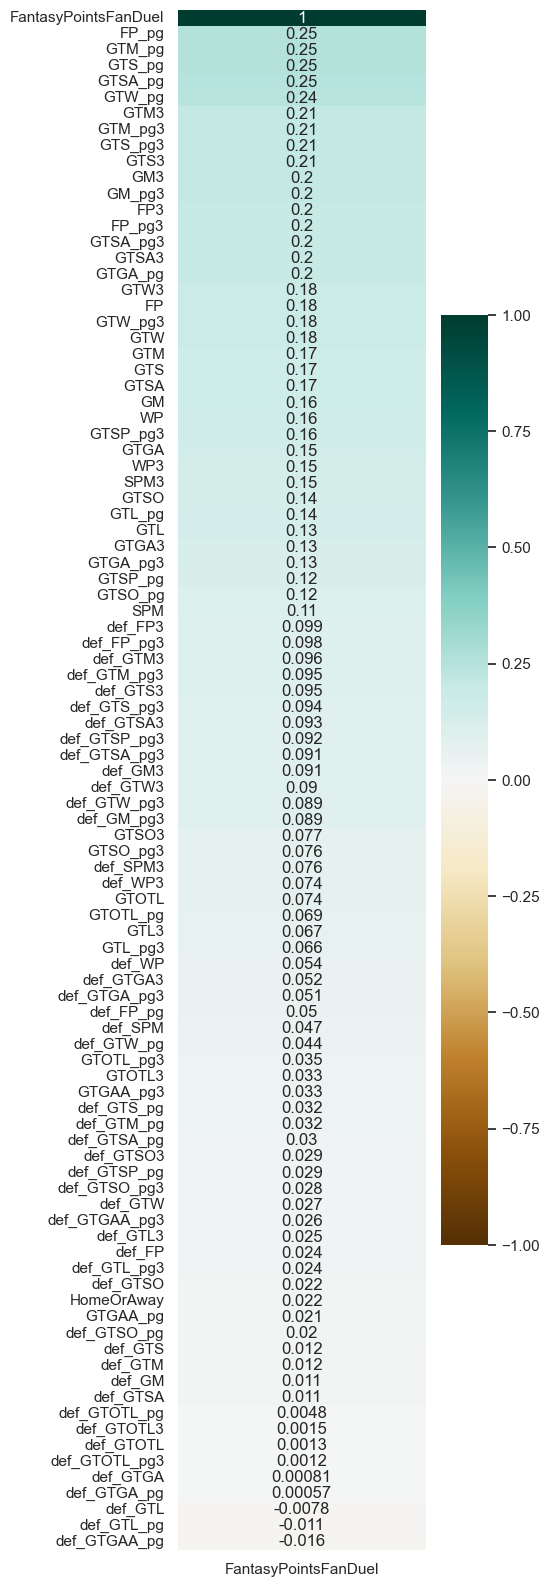

In [58]:
plt.figure(figsize=(4, 20))
heatmap = sns.heatmap(df.corr()[['FantasyPointsFanDuel']].sort_values(by='FantasyPointsFanDuel', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')